TP 3 -- Apprentissage par Machines à Vecteurs de Support sous sklearn

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np


mnist = fetch_mldata('MNIST original')

#On réduit la taille de l'échantillon, trop long sinon...
random = np.random.randint(70000, size=5000)
data = mnist.data[random]
target = mnist.target[random]

images_train, images_test, target_train, target_test = train_test_split(data, target, train_size = 0.7)


/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
from sklearn.metrics import precision_score
import time
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

predictions = {}
for kernel in kernels: 
    print("----", kernel, "----")
    classifier = SVC(kernel=kernel)
    print("Apprentissage...")
    debut = time.clock()
    classifier.fit(images_train, target_train)
    fin = time.clock()
    duree = fin-debut
    print("Prédiction...")
    prediction = classifier.predict(images_test)
    
    predictions[kernel] = {}
    predictions[kernel]['duree'] = duree 
    predictions[kernel]['score'] = precision_score(target_test, prediction, average='micro')
    
print(predictions)

#Does not work for precomputed kernel.

---- linear ----
Apprentissage...
Prédiction...
---- poly ----
Apprentissage...
Prédiction...
---- rbf ----
Apprentissage...
Prédiction...
---- sigmoid ----
Apprentissage...
Prédiction...
{'linear': {'duree': 2.261526, 'score': 0.90000000000000002}, 'poly': {'duree': 3.1921939999999998, 'score': 0.93400000000000005}, 'rbf': {'duree': 18.060753000000002, 'score': 0.14999999999999999}, 'sigmoid': {'duree': 17.079110999999997, 'score': 0.11133333333333334}}


In [4]:
for i in kernels:
    print(predictions[i]['duree'])
    print(predictions[i]['score'])

2.261526
0.9
3.1921939999999998
0.934
18.060753000000002
0.15
17.079110999999997
0.111333333333


## Faire varier le paramètre de tolérance aux erreurs C 

In [20]:
scores = []
for i in range(10):
    c = np.random.uniform(0, 40)
    classifier = SVC(kernel='poly', C=c)
    print("Apprentissage...")
    classifier.fit(images_train, target_train)
    print("Prédiction...")
    prediction = classifier.predict(images_test)
    scores.append({})
    scores[i]['c'] = c 
    scores[i]['score'] = precision_score(target_test, prediction, average='micro')
print(scores)

Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
[{'c': 17.30824490648176, 'score': 0.93400000000000005}, {'c': 7.5422729411153755, 'score': 0.93400000000000005}, {'c': 1.1072826246781853, 'score': 0.93400000000000005}, {'c': 14.390685144160047, 'score': 0.93400000000000005}, {'c': 9.919465799808766, 'score': 0.93400000000000005}, {'c': 20.599080298967202, 'score': 0.93400000000000005}, {'c': 33.24283702958198, 'score': 0.93400000000000005}, {'c': 17.0065023505949, 'score': 0.93400000000000005}, {'c': 12.050431018506496, 'score': 0.93400000000000005}, {'c': 6.487471733531032, 'score': 0.93400000000000005}]


Faire varier gamma

[0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948, 0.065999999999999948]
[17.30824490648176, 7.5422729411153755, 1.1072826246781853, 14.390685144160047, 9.919465799808766, 20.599080298967202, 33.24283702958198, 17.0065023505949, 12.050431018506496, 6.487471733531032]


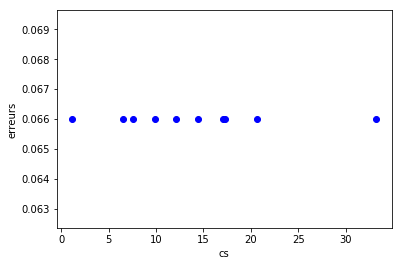

In [21]:
import matplotlib.pyplot as plt

erreurs = []
cs = []
for c in range(len(scores)):
    erreurs.append(1 - scores[c]['score'])
    cs.append(scores[c]['c'])
print(erreurs)
print(cs)

plt.plot(cs, erreurs, 'bo')
plt.ylabel('erreurs')
plt.xlabel('cs')
plt.show()

Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
Apprentissage...
Prédiction...
[]
[0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005, 0.93400000000000005]
[3.980325737526713e-06, 0.0002848665872683115, 0.00044536920286534446, 0.0009173634382605925, 4.371493511011471e-05, 0.0003855265237871265, 0.0004692307174208624, 0.0009738181233999385, 0.0006995955159501518, 0.0008228568189727314]


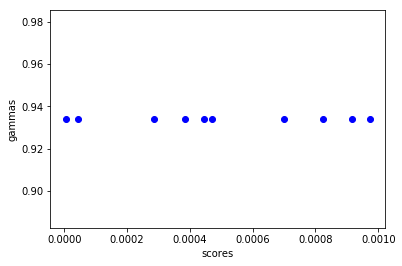

In [27]:
hm = []
for i in range(10):
    gamma = np.random.uniform(0, 0.001)
    classifier = SVC(kernel='poly', gamma=gamma)
    print("Apprentissage...")
    classifier.fit(images_train, target_train)
    print("Prédiction...")
    prediction = classifier.predict(images_test)
    hm.append({})
    hm[i]['gamma'] = gamma
    hm[i]['score'] = precision_score(target_test, prediction, average='micro')

print(scores)

scores = []
gammas = []
for c in hm:
    scores.append(c['score'])
    gammas.append(c['gamma'])
print(scores)
print(gammas)

plt.plot(gammas, scores, 'bo')
plt.ylabel('gammas')
plt.xlabel('scores')
plt.show()

GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'poly'), 'C':[0.000001, 5], 'gamma':[0,10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

clf.fit(images_train, target_train)



AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [43]:
print(clf.best_estimator_)

from sklearn.metrics import confusion_matrix
svc = SVC()
prediction = clf.predict(images_test)
cm = confusion_matrix(target_test, prediction)

print(cm)


SVC(C=1e-06, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[120   2   0   0   0   3   0   0   0   0]
 [  0 167   0   0   0   0   0   0   0   0]
 [  0   0 129   1   1   0   0   4   0   0]
 [  0   3   5 139   0   6   0   2   2   0]
 [  0   1   1   0 132   0   0   0   2   6]
 [  3   1   0   3   0 134   1   0   0   2]
 [  3   5   0   0   0   1 161   0   0   0]
 [  0   0   0   0   1   0   0 168   0   2]
 [  2   2   6   3   3   0   0   0 130   0]
 [  4   1   1   4   3   5   0   4   0 121]]
